In [1]:
#Use the car dataset containing information of Mileage, Age, and Sell-Price. Split the dataset into training and test dataset 
#in 80:20 ratio. Train the Linear Regression model on the training dataset and predict the Sell-Price for test dataset. (Multivariate Linear Regression)

In [2]:
#Import the usual libraries for pandas and plotting and DATASET
import pandas as pd
import seaborn as sns
import numpy as np
#import sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df1 = pd.read_csv("C:\\Users\\Abhi Olina Oneeka\\Downloads\\penguins_synthetic_wide.csv")

In [3]:
df1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,51.211594,10.784101,198,6536,female
1,Chinstrap,Dream,49.578723,16.201992,190,3280,male
2,Gentoo,Biscoe,54.473814,16.435158,208,4077,female
3,Adelie,Biscoe,44.907998,25.894140,204,3665,female
4,Adelie,Dream,26.304201,13.736113,160,8000,male


In [4]:
#Check the head of your Dataset and also check out its info(),describe()methods over the dataset.
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            1500 non-null   object 
 1   island             1500 non-null   object 
 2   bill_length_mm     1500 non-null   float64
 3   bill_depth_mm      1500 non-null   float64
 4   flipper_length_mm  1500 non-null   int64  
 5   body_mass_g        1500 non-null   int64  
 6   sex                1500 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 82.2+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,44.855678,17.154575,201.434667,4210.080667
std,9.242021,3.364225,22.064775,1290.829799
min,25.000000,10.000000,160.000000,2000.000000
25%,38.194683,14.873827,185.750000,3316.000000
50%,44.742382,17.078423,200.000000,4107.000000
75%,51.175820,19.291830,216.000000,5026.250000
max,70.000000,30.000000,260.000000,8000.000000


C:\Users\Abhi Olina Oneeka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhi Olina Oneeka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhi Olina Oneeka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhi Olina Oneeka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

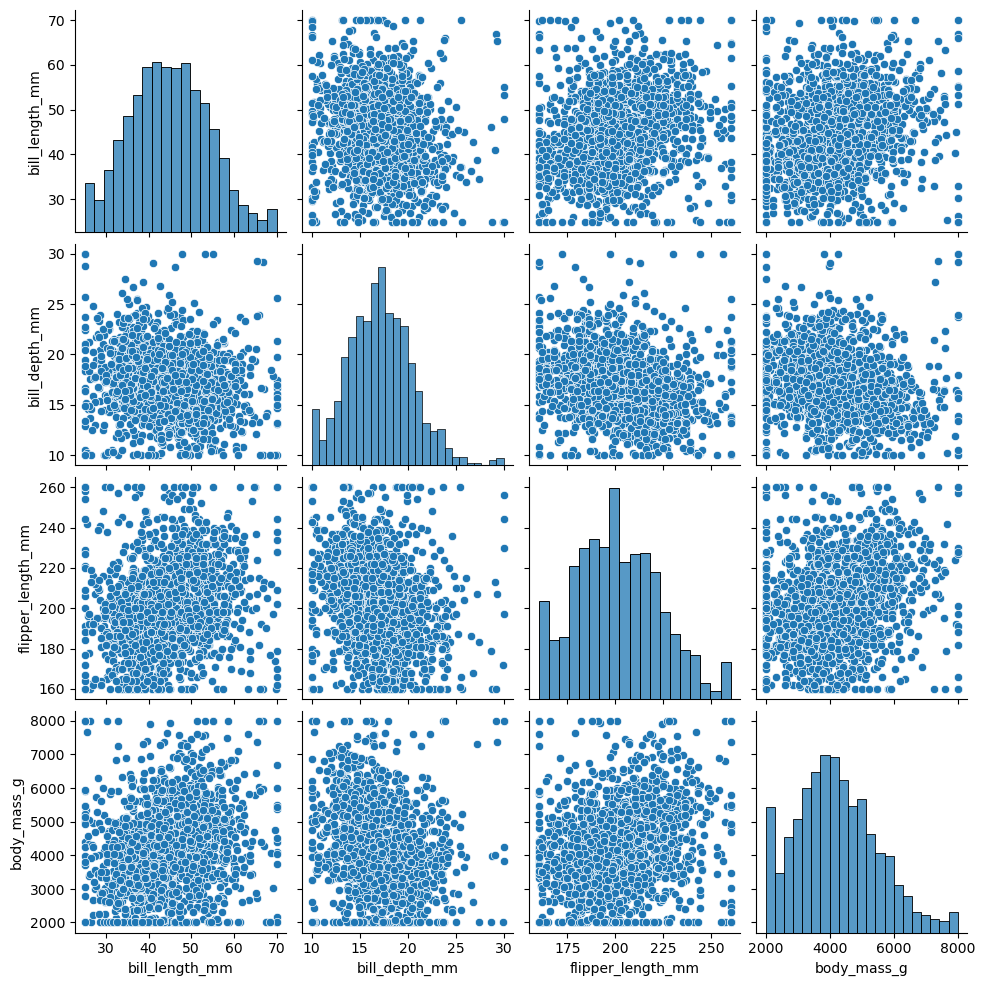

In [5]:
#Explore the types of relationships across the entire dataset using ‘pairplot’ method of seaborn and comment on that.
sns.pairplot(df1)


In [6]:
import numpy as np

df1["body_mass_g"] = (
    19.4 * df1["bill_length_mm"]
    - 56.5 * df1["bill_depth_mm"]
    + 12.3 * df1["flipper_length_mm"]
    + np.random.normal(0, 50, size=len(df1))   # small random noise
)


In [7]:
#Set a variable X equal to the numerical features of the given dataset and a variable Y equal to the “Price” column

X = df1[['bill_length_mm','bill_depth_mm', 'flipper_length_mm']]
Y = df1['body_mass_g']

In [8]:
#Split the data into training and testing sets using model_selection.train_test_split from sklearn such that Test set consists 30% of total data.

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [9]:


# Drop rows with NaN in x_train or y_train
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]  # Keep alignment


In [10]:
from sklearn.impute import SimpleImputer

# Create imputer (replace NaN with mean, you can also use median or most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit on training set, transform both train & test
x_train = imputer.fit_transform(x_train)
x_test  = imputer.transform(x_test)


In [11]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()
lm1.fit(x_train, y_train)


LinearRegression()

In [12]:
#Print the coefficients of the trained model. How can you interpret these coefficients?

print(lm1.score(x_test,y_test))
print(lm1.intercept_)
coeff_df = pd.DataFrame(lm1.coef_,X.columns,columns=['Coefficient'])
coeff_df

0.9866671582165695
3.631132070342119


,Coefficient
bill_length_mm,19.445719
bill_depth_mm,-56.746312
flipper_length_mm,12.304626


In [13]:
#Predict the body mass of the Test Set data and display them

prediction = lm1.predict(x_test)
print(prediction)

[2230.93404568 2290.51306382 1476.00720893 2579.95231808 1983.11814489
 2466.1479897  2729.25237591 2266.05899375 1865.59819083 2505.90283976
 2639.13895504 2825.50665722 2581.33467038 2278.06979404 3199.66311166
 2304.16208121 1708.38197348 2476.32294135 2509.57117946 2167.58855508
 2266.49760292 1839.77522862 2918.60529159 2090.00446692 2598.00674915
 2276.51031242 2342.12752085 2446.15994638 1829.42912028 2200.21562169
 1812.06263688 2088.86787524 2096.59932254 2691.32601814 2301.17371243
 3129.47691716 3118.18517757 3066.8634235  1724.14843814 2494.69617262
 2336.52241573 3218.92403839 2219.58551826 2197.30846572 1994.04903535
 1823.56570677 2579.19273139 2245.89550304 2287.4517807  2424.64784533
 2278.44721735 2984.00754192 2150.91815378 2402.43080215 2191.19961099
 2759.23862782 3571.69546507 2625.46039372 2735.00505637 1907.15340051
 3308.62219045 2391.5629922  2402.20062897 2364.0805902  2841.78677753
 2070.72322159 1780.18010256 2984.44864098 2008.62612989 2056.09607191
 2305.

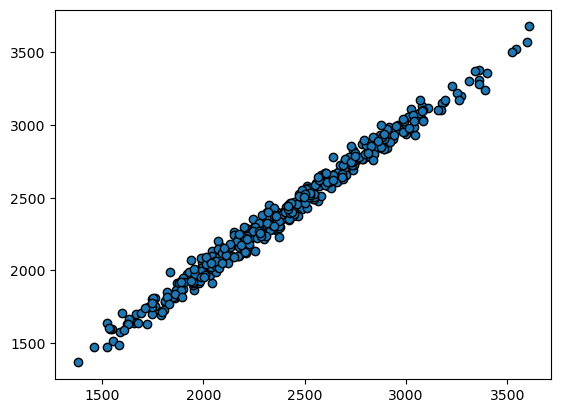

In [14]:
#Create a scatterplot of the real test values versus the predicted values

plt.scatter(y_test,prediction,edgecolor='black')

In [15]:
#Calculate the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error to evaluate our model performance after importing metrics from sklearn.

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 39.94867489918686
MSE: 2471.6755683465167
RMSE: 49.715948832809346


C:\Users\Abhi Olina Oneeka\AppData\Local\Temp\ipykernel_15012\2254374302.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50,hist_kws=dict(edgecolor='black', linewidth=1))
C:\Users\Abhi Olina Oneeka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='body_mass_g', ylabel='Density'>

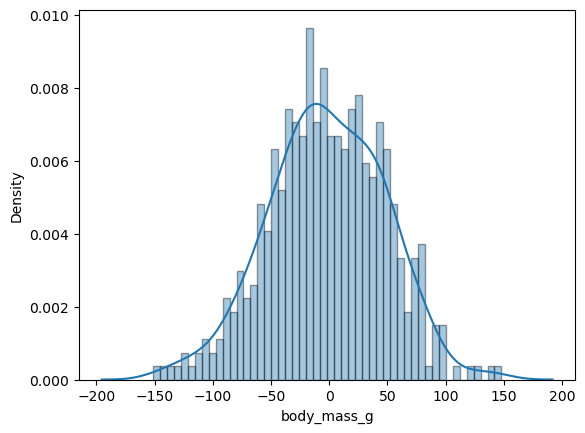

In [16]:
#Plot a Histogram of the residuals. [Use either seaborn distplot, or just plt.hist()]

sns.distplot((y_test-prediction),bins=50,hist_kws=dict(edgecolor='black', linewidth=1))

In [17]:
r_sq=lm1.score(X,Y)
print(r_sq)

0.9876734420712652


C:\Users\Abhi Olina Oneeka\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
# Linear Regression on All Feature Combinations
# and show the score accordinly
# 1. Import necessary libraries
import pandas as pd
from itertools import combinations
from sklearn.linear_model import LinearRegression

# 2. Load your dataset
# (Replace "dev_modified.csv" with your actual file)
#df = pd.read_csv("dev_modified.csv")

# 3. Define the input features (independent variables)
# (replace this features according to your data set) <------

features = ['bill_length_mm','bill_depth_mm', 'flipper_length_mm'] # <-------- this part has to change according to your code

# 4. Define the target variable (dependent variable)
y = df1['body_mass_g']   # <-- Change column name if your target is different

# 5. Loop through all combinations of features
#    this part help you to get score for all possible combinations
for r in range(1, len(features)+1):
    for cols in combinations(features, r):
        # Select the columns for this combination
        x = df1[list(cols)]
        
        # Create and fit the Linear Regression model
        model = LinearRegression().fit(x, y)
        # Print the feature combination and its R² score
        print(cols, "->", model.score(x, y))
# according to your analysis you have to now choose the featurer

('bill_length_mm',) -> 0.3631181704691069
('bill_depth_mm',) -> 0.39217649953536804
('flipper_length_mm',) -> 0.6255178138919102
('bill_length_mm', 'bill_depth_mm') -> 0.6524272185978128
('bill_length_mm', 'flipper_length_mm') -> 0.8183838028786827
('bill_depth_mm', 'flipper_length_mm') -> 0.8358734357681029
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm') -> 0.9876839064789041
